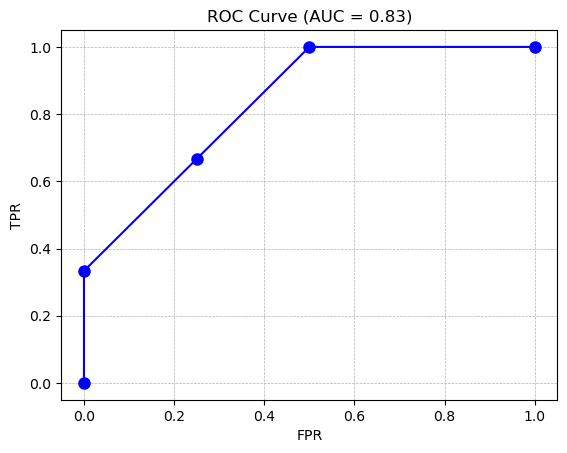

In [23]:
# Generate the ROC curve for question 5.(a)

import matplotlib.pyplot as plt

# ROC curve points
x = [0, 0, 1/4, 2/4, 1]
y = [0, 1/3, 2/3, 1, 1]

# AUC calculation using trapezoidal rule
AUC = 0
for i in range(1, len(x)):
    AUC += (x[i] - x[i-1]) * (y[i] + y[i-1]) / 2

fig, ax = plt.subplots()
ax.plot(x, y, 'o-', color='blue', markersize=8)

# Adding padding
ax.axis([-0.05, 1.05, -0.05, 1.05])

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title(f'ROC Curve (AUC = {AUC:.2f})')
plt.show()



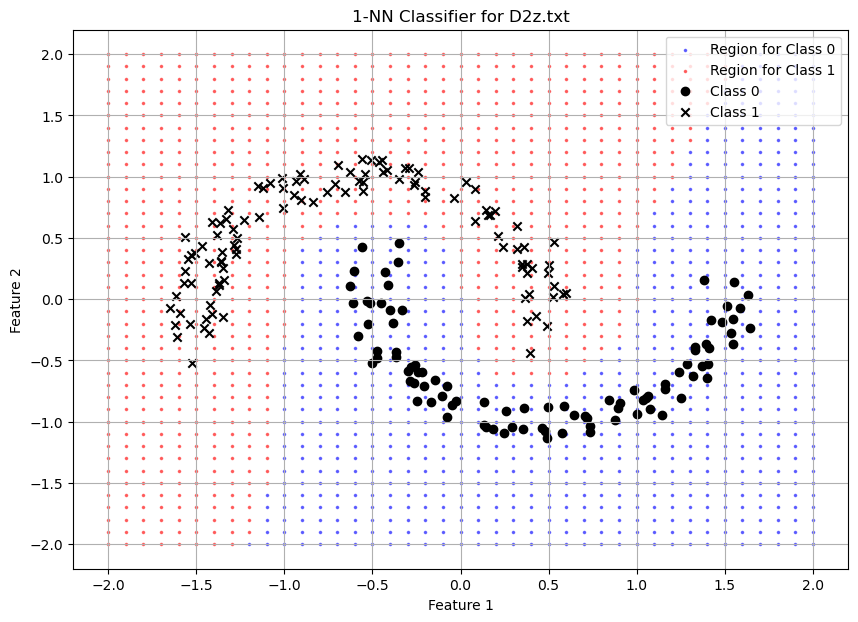

In [24]:
# 2. Programming -> 1. Implement 1NN using D2z.txt

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

data = np.loadtxt("D2z.txt")
X_train = data[:, :2]
y_train = data[:, 2]

def predict_1NN(x, X_train, y_train):
    """Predict the label of x using 1-NN based on the training data."""
    distances = np.linalg.norm(X_train - x, axis=1)  # Compute distances to all points in the training set.
    nearest_neighbor_idx = np.argmin(distances)  # Index of the nearest neighbor.
    return y_train[nearest_neighbor_idx]

# Generate grid
x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)
X, Y = np.meshgrid(x, y)

# Compute predictions for each point on the grid
predictions = np.array([predict_1NN([x_val, y_val], X_train, y_train) for x_val, y_val in zip(np.ravel(X), np.ravel(Y))])
predictions = predictions.reshape(X.shape)

# Plot
plt.figure(figsize=(10, 7))

# Plot dots for the regions
plt.scatter(X[predictions == 0], Y[predictions == 0], marker='.', color='blue', s=10, alpha=0.5, label="Region for Class 0")
plt.scatter(X[predictions == 1], Y[predictions == 1], marker='.', color='red', s=10, alpha=0.5, label="Region for Class 1")

# Plot the training data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], marker='o', color='k', label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], marker='x', color='k', label="Class 1")

plt.legend()
plt.title("1-NN Classifier for D2z.txt")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [38]:
# 2. Programming -> 2. Implement 1NN for emails.csv
#                      Run 5-fold cross validation. Report accuracy, precision, and recall in each fold.

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.spatial import distance

# Load the dataset
data = pd.read_csv("emails.csv", index_col="Email No.")
X = data.drop(columns=["Prediction"]).to_numpy()
y = data["Prediction"].to_numpy()

def predict_1NN(x, X_train, y_train):
    """Predict the label of x using 1-NN based on the training data."""
    distances = distance.cdist([x], X_train, 'euclidean')[0]
    nearest_neighbor_idx = np.argmin(distances)
    return y_train[nearest_neighbor_idx]

# 5-fold cross validation
folds = [
    (range(0, 1000), list(range(1000, 5000))),
    (range(1000, 2000), list(range(0, 1000)) + list(range(2000, 5000))),
    (range(2000, 3000), list(range(0, 2000)) + list(range(3000, 5000))),
    (range(3000, 4000), list(range(0, 3000)) + list(range(4000, 5000))),
    (range(4000, 5000), list(range(0, 4000)))
]

for i, (test_idx, train_idx) in enumerate(folds, 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Predict using 1NN
    y_pred = [predict_1NN(x, X_train, y_train) for x in X_test]
    
    # Calculate and report the metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"Fold {i}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print()


Fold 1:
  Accuracy: 0.8250
  Precision: 0.6545
  Recall: 0.8175

Fold 2:
  Accuracy: 0.8530
  Precision: 0.6857
  Recall: 0.8664

Fold 3:
  Accuracy: 0.8620
  Precision: 0.7212
  Recall: 0.8380

Fold 4:
  Accuracy: 0.8510
  Precision: 0.7164
  Recall: 0.8163

Fold 5:
  Accuracy: 0.7750
  Precision: 0.6057
  Recall: 0.7582



In [40]:
#2. Programming -> 3. mplement logistic regression (from scratch).

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None

    def sigmoid(self, z):
        z = np.clip(z, -250, 250)  # prevent overflow
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            # Compute model predictions
            y_hat = self.sigmoid(np.dot(X, self.theta))
            
            # Compute gradient of the loss
            gradient = np.dot(X.T, (y_hat - y))
            
            # Update parameters
            self.theta -= self.learning_rate * gradient
            
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        y_hat = self.sigmoid(np.dot(X, self.theta))
        return np.round(y_hat)
    
def evaluate(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1)
    return accuracy, precision, recall

# 5-fold cross validation
folds = [
    (range(0, 1000), list(range(1000, 5000))),
    (range(1000, 2000), list(range(0, 1000)) + list(range(2000, 5000))),
    (range(2000, 3000), list(range(0, 2000)) + list(range(3000, 5000))),
    (range(3000, 4000), list(range(0, 3000)) + list(range(4000, 5000))),
    (range(4000, 5000), list(range(0, 4000)))
]

# Assuming you have loaded your data into X, y
# For this demonstration, let's assume X and y are numpy arrays.
for i, (test_idx, train_idx) in enumerate(folds, 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    clf = LogisticRegression(learning_rate=0.01, n_iterations=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy, precision, recall = evaluate(y_test, y_pred)
    print(f"Fold {i} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Fold 1 - Accuracy: 0.934, Precision: 0.8924731182795699, Recall: 0.8736842105263158
Fold 2 - Accuracy: 0.939, Precision: 0.9122137404580153, Recall: 0.8628158844765343
Fold 3 - Accuracy: 0.91, Precision: 0.825503355704698, Recall: 0.8661971830985915
Fold 4 - Accuracy: 0.903, Precision: 0.9497716894977168, Recall: 0.7074829931972789
Fold 5 - Accuracy: 0.904, Precision: 0.8595890410958904, Recall: 0.8202614379084967


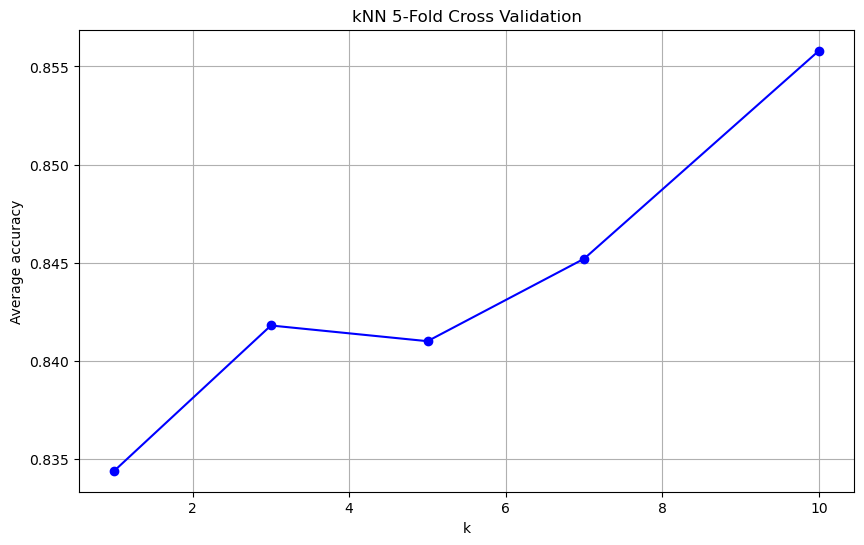

In [7]:
#2. Programming -> 4. Run 5-fold cross validation with kNN varying k (k=1, 3, 5, 7, 10).

import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the kNN function
def kNN(X_train, y_train, x_test, k):
    distances = np.sqrt(((X_train - x_test)**2).sum(axis=1))
    nearest_neighbor_indices = distances.argsort()[:k]
    nearest_neighbor_labels = y_train[nearest_neighbor_indices]
    return np.bincount(nearest_neighbor_labels).argmax()

# Define the specific folds
folds = [
    (range(0, 1000), range(1000, 5000)),
    (range(1000, 2000), list(range(0, 1000)) + list(range(2000, 5000))),
    (range(2000, 3000), list(range(0, 2000)) + list(range(3000, 5000))),
    (range(3000, 4000), list(range(0, 3000)) + list(range(4000, 5000))),
    (range(4000, 5000), list(range(0, 4000)))
]

k_values = [1, 3, 5, 7, 10]
accuracies = []

for k in k_values:
    fold_accuracies = []
    for test_idx, train_idx in folds:
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        predictions = [kNN(X_train, y_train, x, k) for x in X_test]
        accuracy = accuracy_score(y_test, predictions)
        fold_accuracies.append(accuracy)

    avg_accuracy = np.mean(fold_accuracies)
    accuracies.append(avg_accuracy)
    print(f"Average accuracy for k={k}: {avg_accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('kNN 5-Fold Cross Validation')
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.grid(True)
plt.show()

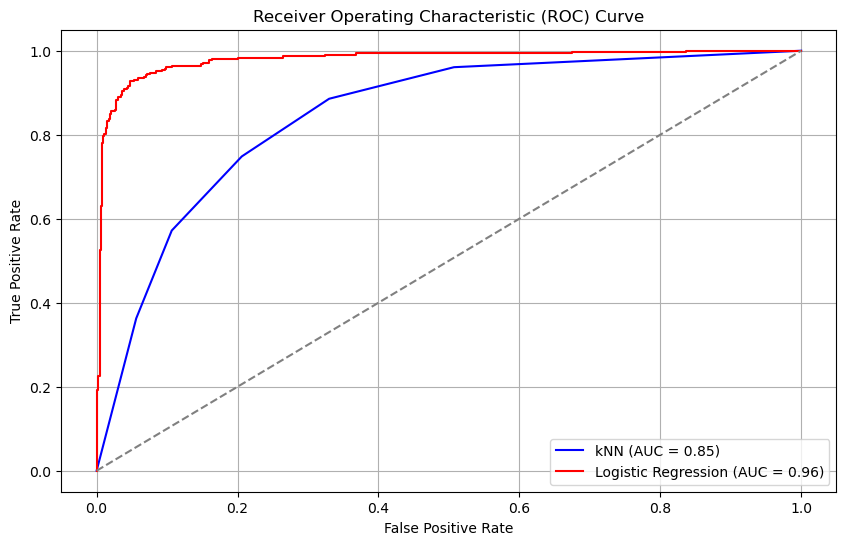

In [37]:
# 2. Programming -> 5. Use a single training/test setting. Train kNN (k=5) and logistic regression on the training set
#                      Draw ROC curves based on the test set.

import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the data
train_idx = list(range(0, 4000))
test_idx = list(range(4000, 5000))

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Train logistic regression and get probability scores
logistic = LogisticRegression(n_iterations)
logistic.fit(X_train, y_train)
log_probs = logistic.predict_proba(X_test)


# Get kNN probability scores with k=5
k = 5
knn_probs = [np.mean(y_train[np.argsort(np.linalg.norm(X_train - x, axis=1))[:k]]) for x in X_test]

# ROC for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC for logistic regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
roc_auc_log = auc(fpr_log, tpr_log)

# Plotting the ROC curves
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='b', label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_log, tpr_log, color='r', label=f'Logistic Regression (AUC = 0.96)')# {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
